# **Inisialisasi dan Persiapan Dataset**

**Import Cara Google Drive**

In [1]:
"""
import pandas as pd

from google.colab import drive
drive.mount ('/content/gdrive')

df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Dicoding Belajar Mengembangkan Machine Learning (Tingkat Menengah)/Dicoding_Dataset_MachineLearning(Intermediet)_Folders/citrus.csv')
"""

"\nimport pandas as pd\n\nfrom google.colab import drive\ndrive.mount ('/content/gdrive')\n\ndf=pd.read_csv('gdrive/My Drive/Colab Notebooks/Dicoding Belajar Mengembangkan Machine Learning (Tingkat Menengah)/Dicoding_Dataset_MachineLearning(Intermediet)_Folders/citrus.csv')\n"

**Import Cara Biasa Menggunakan file Github**

In [2]:
#Import dataset grapefruit.zip yang merupakan dataset informasi perbedaan anggur dan orange dalam bentuk .csv
!wget --no-check-certificate \
  https://github.com/AhmadZakkiZainalAbidin/Model_For_TwoClass_Classification/raw/main/oranges%20vs%20grapefruit.zip \
  -O /content//grapefruit.zip

--2024-03-22 02:46:51--  https://github.com/AhmadZakkiZainalAbidin/Model_For_TwoClass_Classification/raw/main/oranges%20vs%20grapefruit.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AhmadZakkiZainalAbidin/Model_For_TwoClass_Classification/main/oranges%20vs%20grapefruit.zip [following]
--2024-03-22 02:46:51--  https://raw.githubusercontent.com/AhmadZakkiZainalAbidin/Model_For_TwoClass_Classification/main/oranges%20vs%20grapefruit.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62683 (61K) [application/zip]
Saving to: ‘/content//grapefruit.zip’

/content//grapefrui 100%[=================

In [3]:
#melakukan ekstraksi file zip yang telah diunduh

import zipfile
file_zip = '/content/grapefruit.zip'
zip_ref = zipfile.ZipFile(file_zip,'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/grapefruit.zip' mode='r'>>

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/citrus.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
df.head(10000)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [7]:
df.groupby('name').nunique()

,diameter,weight,red,green,blue
name,,,,,
grapefruit,611,3585,70,69,48
orange,644,3581,68,65,36


Perlu diperhatikan model jst tidak dapat memproses string sehingga perlu dilakukan perubahan nilai name string menjadi angka. Ini dilakukan untuk data bertipe object ('string') pada kolom name

In [8]:
df.name[df.name=='orange']=0
df.name[df.name=='grapefruit']=1

<ipython-input-8-756dd6d2bba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name=='orange']=0
<ipython-input-8-756dd6d2bba6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name=='grapefruit']=1


In [9]:
df.groupby('name').nunique()

,diameter,weight,red,green,blue
name,,,,,
0,644,3581,68,65,36
1,611,3585,70,69,48


Agar dapat diproses oleh model dataset terlebih dahulu diubah dalam bentuk array dengan menggunakan atribut values

In [10]:
dataset= df.values
dataset

array([[0, 2.96, 86.76, 172, 85, 2],
       [0, 3.91, 88.05, 166, 78, 3],
       [0, 4.42, 95.17, 156, 81, 2],
       ...,
       [1, 15.59, 256.5, 168, 82, 20],
       [1, 15.92, 260.14, 142, 72, 11],
       [1, 16.45, 261.51, 152, 74, 2]], dtype=object)

**Pisah antara label atau kolom nama (baris di array) dengan kolom lain (kolom di array)**

Pilih 5 kolom terakhir sebagai atribut (ini dikarenakan terdapat angka label (0 atau 1) dalam setiap array sehingga perlu dihilangkan)

In [11]:
X= dataset[:,1:6]
#bilangan sebelum koma untuk memilih baris pada dataframe
#bilangan setelah koma untuk memilih koom pada dataframe
X

array([[2.96, 86.76, 172, 85, 2],
       [3.91, 88.05, 166, 78, 3],
       [4.42, 95.17, 156, 81, 2],
       ...,
       [15.59, 256.5, 168, 82, 20],
       [15.92, 260.14, 142, 72, 11],
       [16.45, 261.51, 152, 74, 2]], dtype=object)

Selanjutnya, pisahkan label dari dataset. Pada dataset kita, label terdapat pada kolom pertama

In [12]:
y = dataset[:,0]
#array numpy berisi label
y

array([0, 0, 0, ..., 1, 1, 1], dtype=object)

In [13]:
#Melakukan pengecekan Array yang telah dibuat
X.shape, y.shape

((10000, 5), (10000,))

**Tambahan untuk mengecek informasi nilai label pada array**

In [14]:
def unique1(list1) :
  unique_list=[]
  for x in list1 :
    if x not in unique_list :
      unique_list.append(x)
  for x in unique_list :
    print (x)

unique1(y)

0
1


# **Preprocessing Dataset & Persiapan Data Training dan Testing**

Lakukan normalisasi agar jst bisa mempelajari dataset dengan baik (dilakukan untuk 5 kolom yang telah dipisahkan dengan label)

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale.shape, X_scale

((10000, 5),
 array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
        [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
        [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
        ...,
        [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
        [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
        [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]]))

Pisahkan data menjadi data latih dan data uji untuk mengevaluasi kinerja model yang dibuat menggunakan Fungsi train_test_split dengan rasio 30% (0.3) sebagai data uji

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size= 0.3)

Dataset untuk label (Y_train & Y_test) dilakukan perubahan ke float32 (karena perubahan sebelumnya menjadi angka object bukan float32 or Uint8)

In [17]:
import numpy as np
Y_train =Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# **Pembuatan Model & Latihan Model Sequential**

In [18]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Kita akan membuat model dengan 3 layer dengan 2 layer pertama menggunakan relu dan layer terakhir dengan sigmoid karena sigmoid memetakan probabilitas dari 0 sampai 1 (cocok untuk klasifikasi biner

NB : Anda bisa menggunakan fungsi aktivasi lainnya (menggantikan relu dengan sigmoid)

In [19]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Setelah model terbentuk tentukan optimizer dan loss function.


*   Untuk optimizer digunakan stochastic gradient descent (sgd) yang umum digunakan untuk dataset kecil
*   Gunakan loss fucntion yaitu binary_crossentropy untuk klasifikasi masalah 2 kelas (biner)
*   Tampilkan metrics accuracy untuk memantau akurasi pelatihan model

Selain itu, pada model yang dibuat tambahkan callbacks untuk menghentikan proses training apabila telah memenuhi target yang diminta

In [21]:
class Callback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self, epoch, logs={}) :
    if(logs.get('accuracy') > 0.93 and logs.get('loss') < 0.18) :
      print(f"\nSelamat Akurasi {logs.get('accuracy')} Tercapai !!!")
      self.model.stop_training = True
callbacks = Callback()

In [22]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Lakukan pelatihan model

In [23]:
twoclass_model=model.fit(X_train, Y_train, epochs=300, callbacks=[callbacks])

Epoch 1/300
219/219 [==============================] - 2s 3ms/step - loss: 0.6907 - accuracy: 0.4820
Epoch 2/300
219/219 [==============================] - 1s 3ms/step - loss: 0.6454 - accuracy: 0.7824
Epoch 3/300
219/219 [==============================] - 1s 4ms/step - loss: 0.5873 - accuracy: 0.9013
Epoch 4/300
219/219 [==============================] - 1s 4ms/step - loss: 0.5106 - accuracy: 0.9187
Epoch 5/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4172 - accuracy: 0.9256
Epoch 6/300
219/219 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.9256
Epoch 7/300
219/219 [==============================] - 1s 4ms/step - loss: 0.2700 - accuracy: 0.9284
Epoch 8/300
219/219 [==============================] - 1s 3ms/step - loss: 0.2327 - accuracy: 0.9293
Epoch 9/300
219/219 [==============================] - 1s 4ms/step - loss: 0.2114 - accuracy: 0.9301
Epoch 10/300
219/219 [==============================] - 1s 3ms/step - loss: 0.1986 - accura

# **Lakukan Evaluasi Model dengan Plot dan Train**

Tambahan Plot Akurasi dan Loss Train

94/94 [==============================] - 0s 970us/step - loss: 0.1884 - accuracy: 0.9223


[0.1884312480688095, 0.9223333597183228]

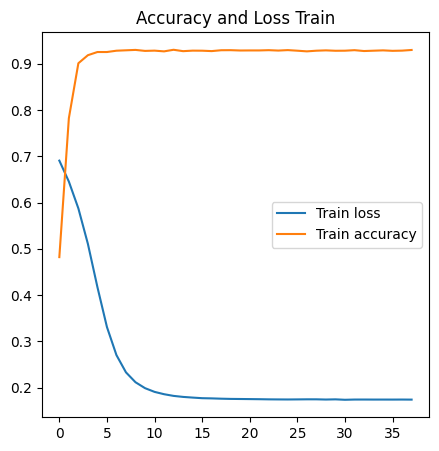

In [24]:
#Tambahan untuk melihat plot hasil pelatihan (train loss) tiap epochnya
import matplotlib.pyplot as plt

def show_graph(history):
    fig, ax = plt.subplots(1, figsize=(5,5))
    ax.set_title('Accuracy and Loss Train')
    ax.plot(history.epoch, history.history["loss"], label="Train loss")
    ax.plot(history.epoch, history.history['accuracy'], label='Train accuracy')
    ax.legend()

show_graph(twoclass_model)
model.evaluate(X_test, Y_test)

In [25]:
"""
!pip install -q opendatasets

import opendatasets as od
od.download('https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit/download?datasetVersionNumber=2')
"""

"\n!pip install -q opendatasets\n\nimport opendatasets as od\nod.download('https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit/download?datasetVersionNumber=2')\n"